# &laquo;Машинное обучение&raquo;, AI Masters

### Домашняя работа №2. Pandas, Matplotlib, Seaborn.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# recommended: add your own rcparams here

## Блок 1. Воспроизведение графиков (6 баллов)

Дополнительные баллы можно получить при очень точном воспроизведении графиков.

Disclaimer: Не все графики в этом блоке имеют глубокий смысл. Скорее они призваны дать вам увидеть "а как еще можно". Надеюсь, что процесс их воспроизведения будет для вас полезен ;)

### Задача 1.0 (0 баллов)

Загрузите датасет в Pandas.

На основе этого датасета вам необходимо будет построить графики в заданиях блока 1.

In [2]:
!wget https://data.bioml.ru/htdocs/courses/python/datasci/pandas/data/winemag-data-130k-noreview-v2.csv -O winemag-data-noreview.csv

--2025-10-04 17:56:36--  https://data.bioml.ru/htdocs/courses/python/datasci/pandas/data/winemag-data-130k-noreview-v2.csv
Resolving data.bioml.ru (data.bioml.ru)... 188.120.231.217
Connecting to data.bioml.ru (data.bioml.ru)|188.120.231.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18477761 (18M) [text/csv]
Saving to: ‘winemag-data-noreview.csv’

winemag-data-norevi 100%[===================>]  17.62M  9.22MB/s    in 1.9s    

2025-10-04 17:56:39 (9.22 MB/s) - ‘winemag-data-noreview.csv’ saved [18477761/18477761]



### Задача 1.1 (0.5 балла)

Напишите код, который воспроизводит график:

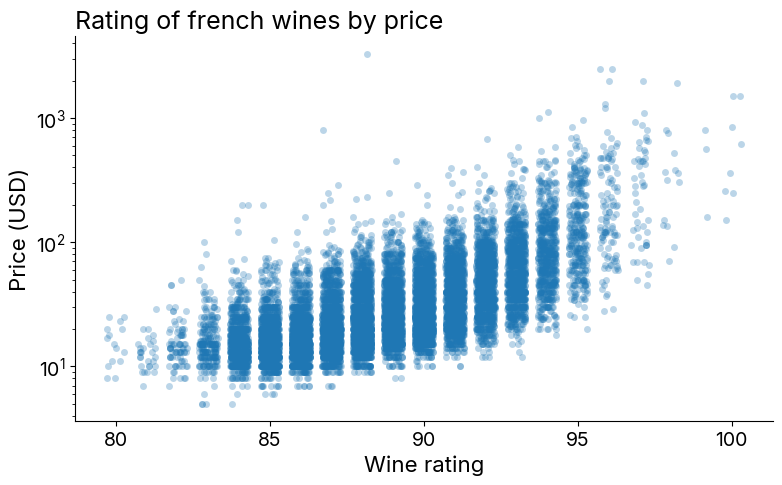

/var/folders/qr/qzgp_pn563qg5qkb6glmxs0r0000gn/T/ipykernel_2185/431756553.py:27: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(bottom=0)


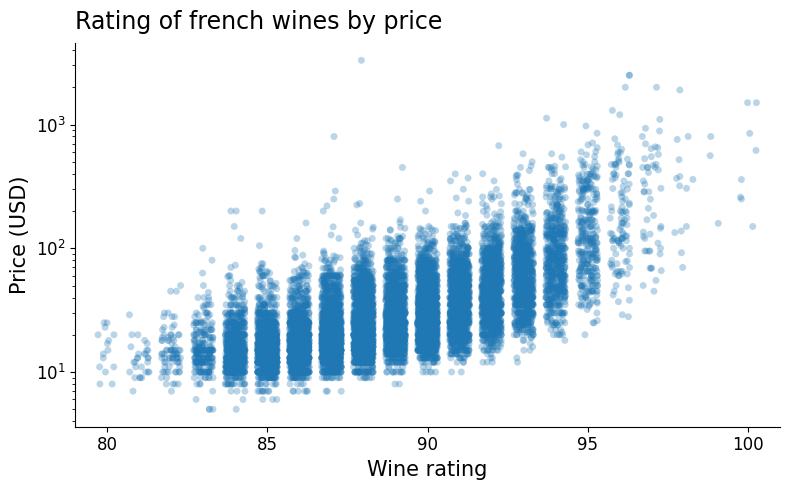

In [3]:
from matplotlib import ticker

data_url = 'https://data.bioml.ru/htdocs/courses/python/datasci/pandas/data/winemag-data-130k-noreview-v2.csv'
wine_data = pd.read_csv(data_url)

french_wines = wine_data[wine_data['country'] == 'France'].dropna(subset=['price'])
#равномерно распределение кажется очень похожим 
jitter_amount = 0.4 / 1.3
rating_jitter = french_wines['points'] + np.random.uniform(-jitter_amount, jitter_amount, size=len(french_wines))

fig, ax = plt.subplots(figsize=(8, 5), dpi=100)

ax.scatter(
    rating_jitter,
    french_wines['price'],
    alpha=0.3,
    s=25,
    edgecolors='none'
)

ax.set_title('Rating of french wines by price', loc='left', fontsize=17, pad=10)
ax.set_xlabel('Wine rating', fontsize=15)
ax.set_ylabel('Price (USD)', fontsize=15)

ax.set_yscale('log')
ax.set_xlim(79, 101)
ax.set_ylim(bottom=0) 

ax.tick_params(axis='both', which='major', labelsize=12)

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=(1.0,)))
ax.yaxis.set_minor_formatter(ticker.NullFormatter())

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


### Задача 1.2 (0.5 балла)

Напишите код, который воспроизводит график:

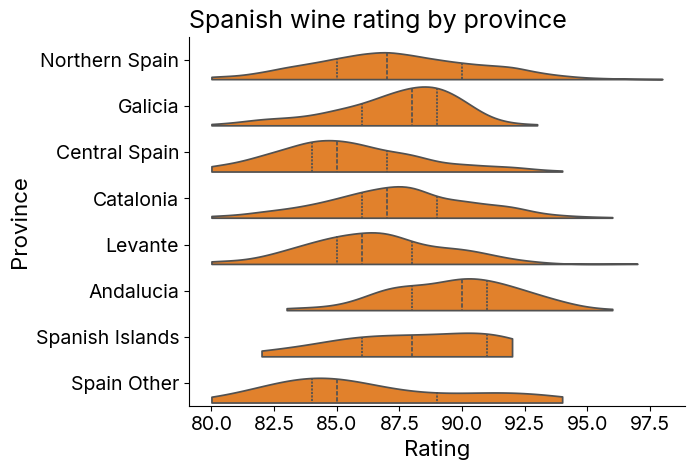

/Users/dejar/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/dejar/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


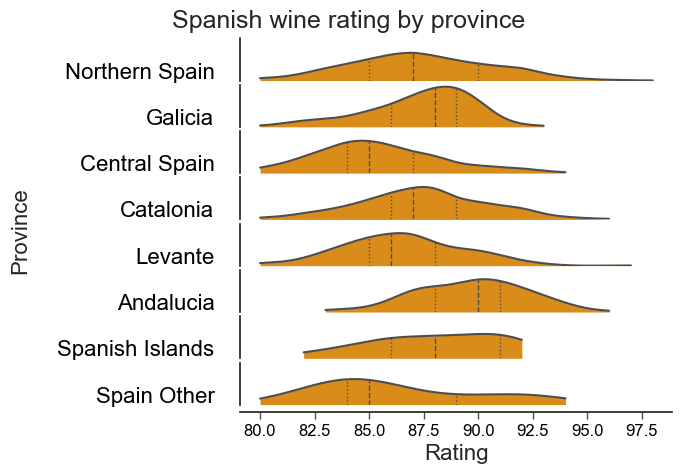

In [ ]:
url = 'https://data.bioml.ru/htdocs/courses/python/datasci/pandas/data/winemag-data-130k-noreview-v2.csv'
df = pd.read_csv(url)

provinces_order = [
    "Northern Spain", "Galicia", "Central Spain", "Catalonia",
    "Levante", "Andalucia", "Spanish Islands", "Spain Other"
]
province_mapping = {
    'Balearic Islands': 'Spanish Islands', 
    'Canary Islands': 'Spanish Islands',
    'Castilla y León': 'Central Spain', 
    'Murcia': 'Levante'
}
#фильтрация 
spain_wines = df[df['country'] == 'Spain'].copy()
spain_wines['province_general'] = spain_wines['province'].map(
    lambda p: province_mapping.get(p, p if p in provinces_order else 'Spain Other')
)
spain_wines['province_general'] = pd.Categorical(
    spain_wines['province_general'], 
    categories=provinces_order, 
    ordered=True
)
spain_wines.dropna(subset=['province_general'], inplace=True)

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

g = sns.FacetGrid(
    spain_wines,
    row="province_general",
    hue="province_general",
    aspect=12,
    height=0.6,
    palette=['#da8c1b'] * len(provinces_order)
)
#оценка плотности распредления 
def kde_ridge(x, color, **kwargs):
    ax = plt.gca()
    sns.kdeplot(x=x, fill=True, color=color, alpha=1, cut=0, linewidth=0, ax=ax)
    kde_plot = sns.kdeplot(x=x, color='0.3', lw=1.5, cut=0, ax=ax)
    
    line = kde_plot.get_lines()[-1]
    x_data, y_data = line.get_data()
    
    quantiles = x.quantile([0.25, 0.5, 0.75])
    for i, q in enumerate(quantiles):
        y_val = np.interp(q, x_data, y_data)
        ax.vlines(q, 0, y_val, color='0.3', 
                 linestyle='--' if i == 1 else ':', linewidth=1)
#подписи
def label(x, color, label):
    ax = plt.gca()
    ax.text(-0.06, 0.2, label, fontweight="normal", color='black', 
            fontsize=16, ha="right", va="center", transform=ax.transAxes)

g.map(kde_ridge, "points")
g.map(label, "points")

g.set_titles("")
g.set(ylabel="")
g.despine(bottom=True, left=True)
#убираем заголовки
for ax in g.axes.flat:
    ax.spines['left'].set_visible(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_yticks([])
    ax.tick_params(axis='x', which='both', bottom=False, top=False, length=0)
    ax.set_ylim(bottom=0)
#косметика 
ax = g.axes.flat[-1]
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_position(('outward', 5))
ax.set_xlabel('Rating', fontsize=16, fontweight='normal')
ax.set_xticks([80.0, 82.5, 85.0, 87.5, 90.0, 92.5, 95.0, 97.5])
ax.tick_params(axis='x', which='both', bottom=True, top=False, 
               length=5, width=1, color='0.3', labelsize=12, labelcolor='black')

g.fig.text(0.03, 0.5, 'Province', va='center', rotation='vertical', 
           fontsize=16, fontweight='normal')
g.fig.subplots_adjust(hspace=0.1, left=0.35, right=0.95, top=0.9)

plt.suptitle('Spanish wine rating by province', y=0.96, 
             fontsize=18, fontweight='normal')

plt.show()


### Задача 1.3 (1 балл)

Напишите код, который воспроизводит график:

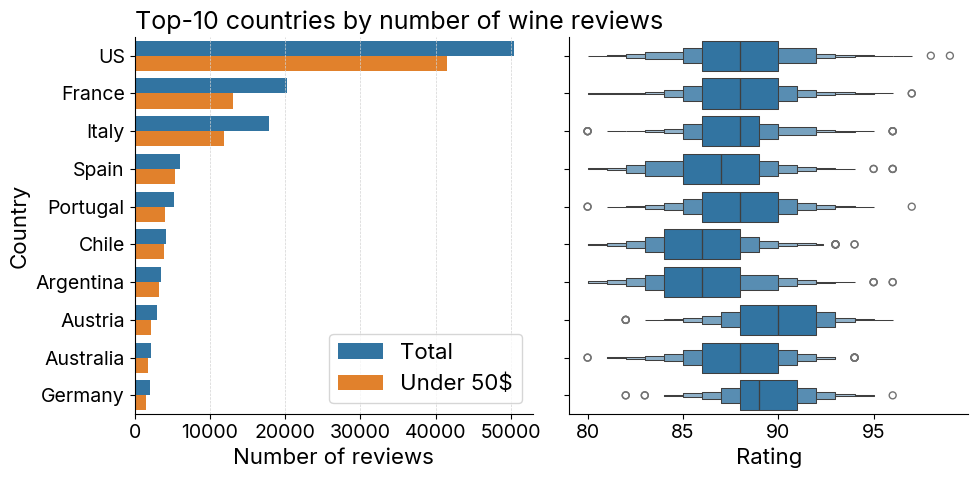

/var/folders/qr/qzgp_pn563qg5qkb6glmxs0r0000gn/T/ipykernel_2185/1778781808.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


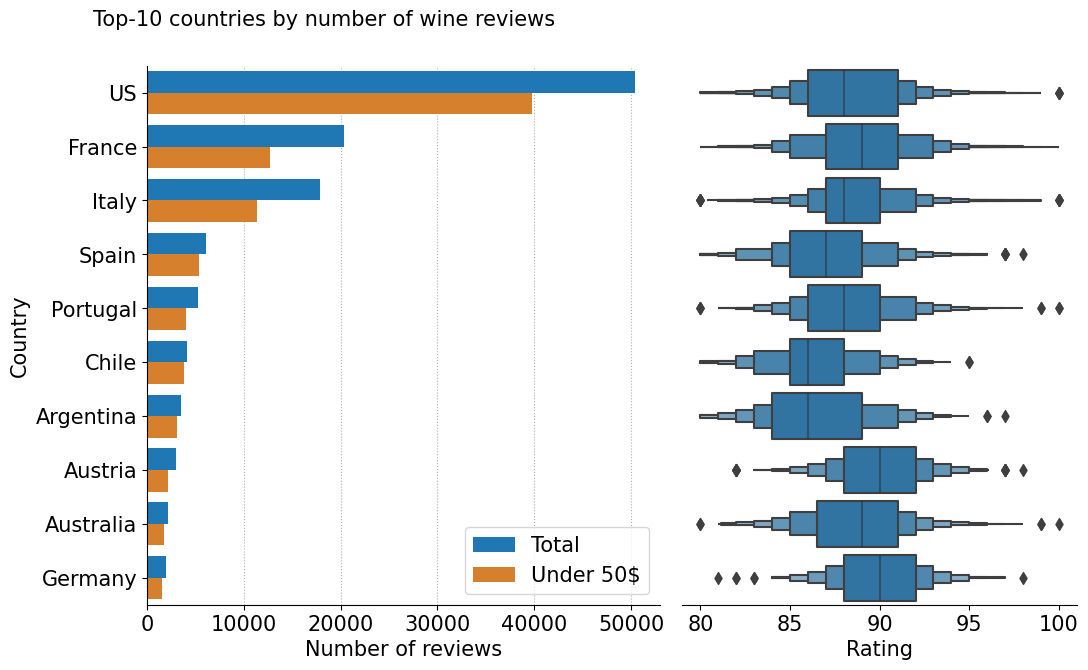

In [7]:
url = 'https://data.bioml.ru/htdocs/courses/python/datasci/pandas/data/winemag-data-130k-noreview-v2.csv'

wine_data = pd.read_csv(url)


top_countries = wine_data['country'].value_counts().nlargest(10).index


reviews_total = wine_data['country'].value_counts().loc[top_countries]
reviews_under_50 = wine_data[wine_data['price'] < 50]['country'].value_counts().reindex(top_countries, fill_value=0)


df_top10 = wine_data[wine_data['country'].isin(top_countries)].copy()
df_top10['country'] = pd.Categorical(df_top10['country'], categories=top_countries, ordered=True)


fig, (ax1, ax2) = plt.subplots(
    figsize=(12, 7),
    ncols=2,
    sharey=True,
    gridspec_kw={'width_ratios': [1.3, 1], 'wspace': 0.05}
)


y_pos = np.arange(len(top_countries))
bar_height = 0.4

#позиции
ax1.barh(y_pos - bar_height / 2, reviews_total, height=bar_height, label='Total', color='#1f77b4', zorder=2)
ax1.barh(y_pos + bar_height / 2, reviews_under_50, height=bar_height, label='Under 50$', color='#d6802e', zorder=2)



ax1.set_yticks(y_pos)
ax1.set_yticklabels(top_countries, fontsize=15)
ax1.invert_yaxis()
ax1.set_xlabel('Number of reviews', fontsize=15)
ax1.set_ylabel('Country', fontsize=15)
ax1.tick_params(axis='x', labelsize=15)
ax1.legend(fontsize=15, loc='lower right')
ax1.grid(axis='x', linestyle=':', zorder=0)


ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

sns.boxenplot(y='country', x='points', data=df_top10, ax=ax2, color='#1f77b4', width=0.85)

ax2.set_ylabel('')
ax2.set_xlabel('Rating', fontsize=15)
ax2.tick_params(axis='x', labelsize=15)
ax2.tick_params(axis='y', length=0)
ax2.set_xlim(left=79)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)


fig.suptitle('Top-10 countries by number of wine reviews', fontsize=15, ha='left', x=0.08, y=0.96)


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Задача 1.4 (1.5 балла)

Напишите код, который воспроизводит график:

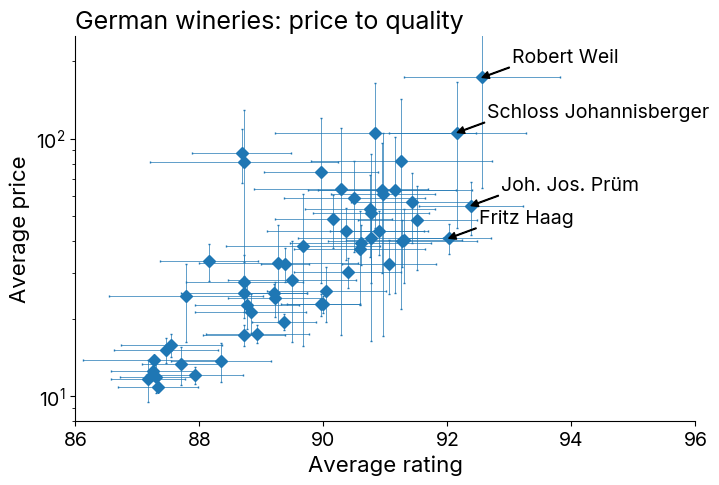

**Указание**: точки - средние, "усы" - стандартные отклонения. Взяты только винодельни с 10 или более отзывами в датасете.

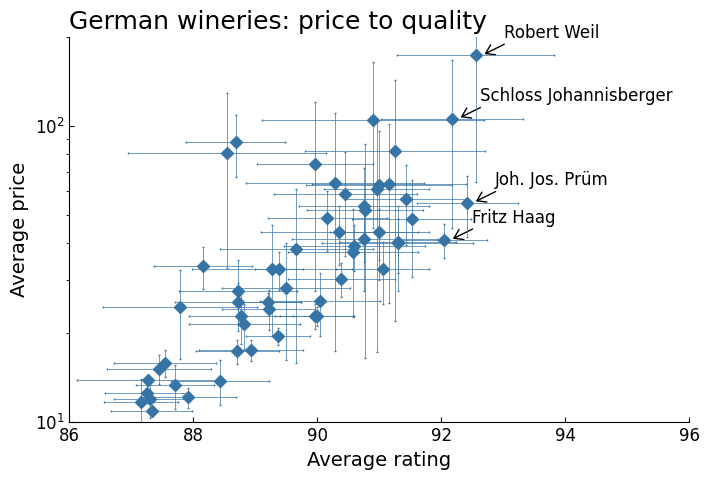

In [25]:
df = pd.read_csv("https://data.bioml.ru/htdocs/courses/python/datasci/pandas/data/winemag-data-130k-noreview-v2.csv")

german_wines = df[df['country'] == 'Germany'].copy()
german_wines.dropna(subset=['price', 'points'], inplace=True)

winery_agg = german_wines.groupby('winery').agg(
    points_mean=('points', 'mean'),
    points_std=('points', 'std'),
    price_mean=('price', 'mean'),
    price_std=('price', 'std'),
    count=('winery', 'size')
)

winery_agg = winery_agg[winery_agg['count'] >= 10].copy()
#стандартное отклонение 
winery_agg['points_err'] = winery_agg['points_std'] / 2
winery_agg['price_err'] = winery_agg['price_std'] / 2




plot_data = winery_agg[(winery_agg['points_mean'] >= 86) & (winery_agg['points_mean'] <= 96)].copy()

fig, ax = plt.subplots(figsize=(8, 5))

ax.errorbar(
    plot_data['points_mean'],
    plot_data['price_mean'],
    yerr=plot_data['price_err'],
    xerr=plot_data['points_err'],
    fmt='D',
    color='#3674A6',
    markersize=6,
    elinewidth=0.5,
    capsize=0.5
)

ax.set_title("German wineries: price to quality", fontsize=18, loc='left', fontfamily='sans-serif')
ax.set_xlabel("Average rating", fontsize=14, fontfamily='sans-serif')
ax.set_ylabel("Average price", fontsize=14, fontfamily='sans-serif')

ax.set_yscale('log')
ax.set_xlim(86, 96)
ax.set_ylim(10, 200)

ax.yaxis.set_major_formatter(LogFormatterSciNotation(base=10))
ax.tick_params(axis='both', which='major', labelsize=12, direction='in')
ax.spines[['right', 'top']].set_visible(False)

import matplotlib.patches as patches
wineries_to_annotate = ['Robert Weil', 'Schloss Johannisberger', 'Joh. Jos. Prüm', 'Fritz Haag']

for winery in wineries_to_annotate:
    if winery in plot_data.index:
        winery_data = plot_data.loc[winery]
        x_point = winery_data['points_mean']
        y_point = winery_data['price_mean']

        # текст над стрелкой
        ax.annotate(
            winery,
            xy=(x_point, y_point),
            xytext=(20, 10),  
            textcoords='offset points',
            ha='left',
            va='bottom',
            fontsize=12
        )

        # стрелка под углом
        start_x = x_point + 0.5
        start_y = y_point * 1.1


        end_x = x_point + 0.1
        end_y = y_point * 1.0 

        
        arrow = patches.FancyArrowPatch(
            (start_x, start_y),
            (end_x, end_y),
            arrowstyle='->,head_width=4,head_length=6',
            color='black',
            linewidth=1
        )
        ax.add_patch(arrow)



        

plt.show()


### Задача 1.5 (1.5 балла)

Напишите код, который воспроизводит график:

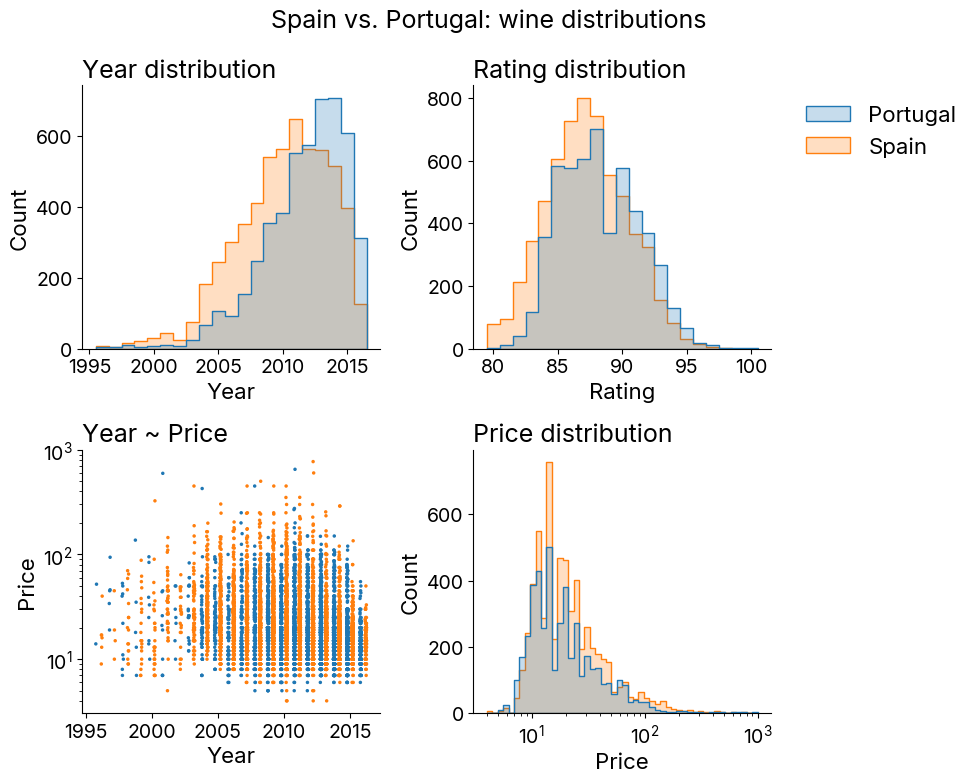

**Указание**: год получен по данным датасета с помощью средств Pandas. Годы вне диапазона [1996, 2016] считаются неизвестными.

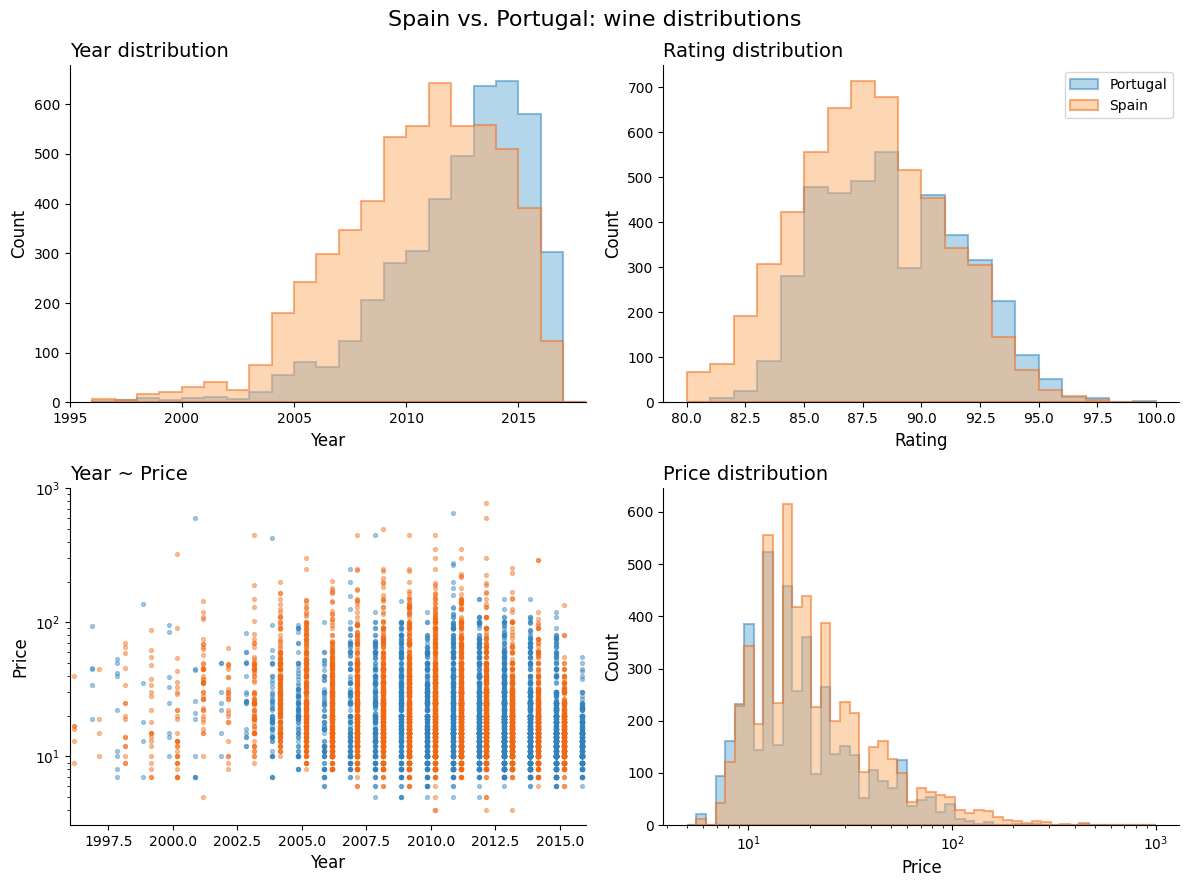

In [ ]:
url = 'https://data.bioml.ru/htdocs/courses/python/datasci/pandas/data/winemag-data-130k-noreview-v2.csv'
df = pd.read_csv(url)

spain_df = df[df['country'] == 'Spain'].copy()
portugal_df = df[df['country'] == 'Portugal'].copy()
#фильтрация
spain_df['year'] = spain_df['title'].str.extract(r'(\d{4})')
portugal_df['year'] = portugal_df['title'].str.extract(r'(\d{4})')

spain_df['year'] = pd.to_numeric(spain_df['year'], errors='coerce')
portugal_df['year'] = pd.to_numeric(portugal_df['year'], errors='coerce')

spain_df = spain_df.dropna(subset=['year', 'points', 'price'])
portugal_df = portugal_df.dropna(subset=['year', 'points', 'price'])

spain_df = spain_df[(spain_df['year'] >= 1996) & (spain_df['year'] <= 2016)]
portugal_df = portugal_df[(portugal_df['year'] >= 1996) & (portugal_df['year'] <= 2016)]

fig, axes = plt.subplots(2, 2, figsize=(12, 9))
fig.suptitle('Spain vs. Portugal: wine distributions', fontsize=16, fontweight='normal')

year_bins = np.arange(1996, 2019, 1)
axes[0, 0].hist(portugal_df['year'], bins=year_bins, histtype='stepfilled', color='#6BAED6', alpha=0.5, edgecolor='#3182BD', linewidth=1.5)
axes[0, 0].hist(spain_df['year'], bins=year_bins, histtype='stepfilled', color='#FDAE6B', alpha=0.5, edgecolor='#F16913', linewidth=1.5)
axes[0, 0].set_xlabel('Year', fontsize=12)
axes[0, 0].set_ylabel('Count', fontsize=12)
axes[0, 0].set_title('Year distribution', fontsize=14, fontweight='normal', loc='left')
axes[0, 0].set_xlim(1995, 2018)
axes[0, 0].spines['top'].set_visible(False)
axes[0, 0].spines['right'].set_visible(False)

rating_bins = np.arange(80, 101, 1)
axes[0, 1].hist(portugal_df['points'], bins=rating_bins, histtype='stepfilled', color='#6BAED6', alpha=0.5, edgecolor='#3182BD', linewidth=1.5)
axes[0, 1].hist(spain_df['points'], bins=rating_bins, histtype='stepfilled', color='#FDAE6B', alpha=0.5, edgecolor='#F16913', linewidth=1.5)
axes[0, 1].set_xlabel('Rating', fontsize=12)
axes[0, 1].set_ylabel('Count', fontsize=12)
axes[0, 1].set_title('Rating distribution', fontsize=14, fontweight='normal', loc='left')
axes[0, 1].legend(['Portugal', 'Spain'], loc='upper right', frameon=True, fontsize=10)
axes[0, 1].spines['top'].set_visible(False)
axes[0, 1].spines['right'].set_visible(False)
#подготовка 
portugal_scatter = portugal_df.copy()
spain_scatter = spain_df.copy()
portugal_scatter['year_jitter'] = portugal_scatter['year'] - 0.15
spain_scatter['year_jitter'] = spain_scatter['year'] + 0.15

axes[1, 0].scatter(portugal_scatter['year_jitter'], portugal_scatter['price'], s=8, color='#3182BD', alpha=0.4)
axes[1, 0].scatter(spain_scatter['year_jitter'], spain_scatter['price'], s=8, color='#F16913', alpha=0.4)
axes[1, 0].set_xlabel('Year', fontsize=12)
axes[1, 0].set_ylabel('Price', fontsize=12)
axes[1, 0].set_title('Year ~ Price', fontsize=14, fontweight='normal', loc='left')
axes[1, 0].set_yscale('log')
axes[1, 0].set_xlim(1996, 2016)
axes[1, 0].spines['top'].set_visible(False)
axes[1, 0].spines['right'].set_visible(False)

price_bins = np.logspace(np.log10(5), np.log10(1000), 50)
axes[1, 1].hist(portugal_df['price'], bins=price_bins, histtype='stepfilled', color='#6BAED6', alpha=0.5, edgecolor='#3182BD', linewidth=1.5)
axes[1, 1].hist(spain_df['price'], bins=price_bins, histtype='stepfilled', color='#FDAE6B', alpha=0.5, edgecolor='#F16913', linewidth=1.5)
axes[1, 1].set_xlabel('Price', fontsize=12)
axes[1, 1].set_ylabel('Count', fontsize=12)
axes[1, 1].set_title('Price distribution', fontsize=14, fontweight='normal', loc='left')
axes[1, 1].set_xscale('log')
axes[1, 1].spines['top'].set_visible(False)
axes[1, 1].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


### Задача 1.6 (1 балл)

Напишите код, который воспроизводит график:

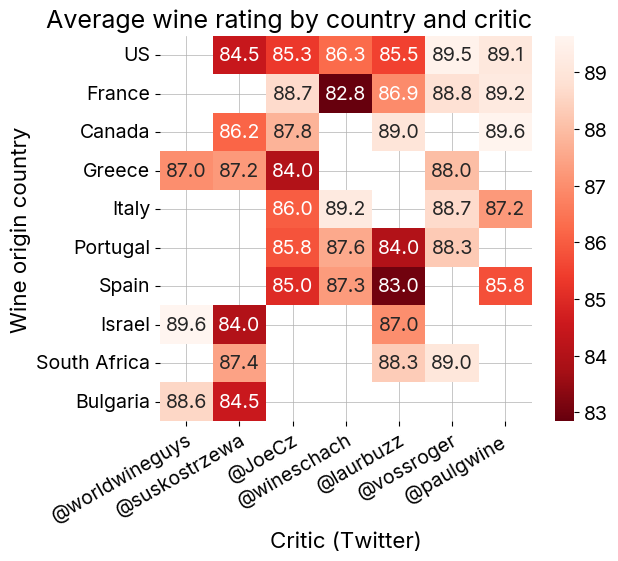

**Указание**: взяты не все страны и критики <font color='lightgray'>(были выбраны критики, которые оценивали наибольшее количество стран, а затем выбраны страны, вино из которых оценивали наибольшее число выбранных критиков, но можно просто выбрать страны и критиков так же, как на картинке)</font>

В ячейках указан средный рейтинг (`points`), выданный критиком винам из определенной страны.

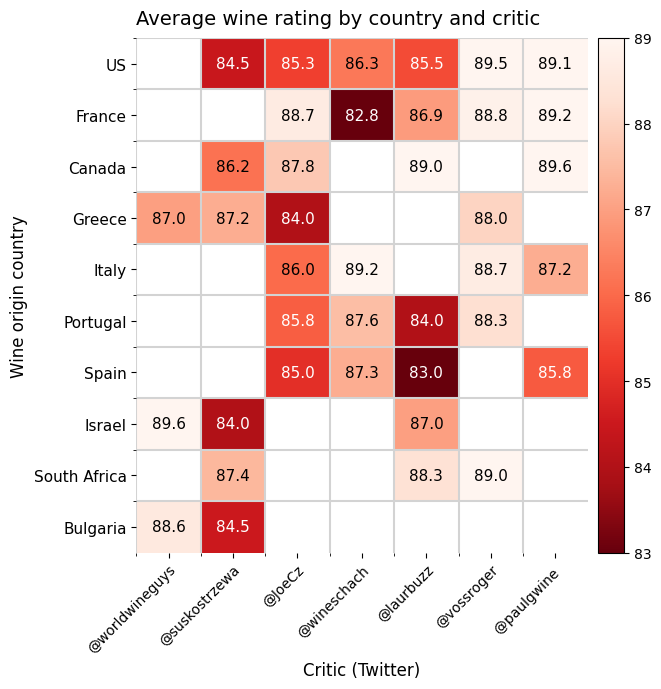

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

url = 'https://data.bioml.ru/htdocs/courses/python/datasci/pandas/data/winemag-data-130k-noreview-v2.csv'
df = pd.read_csv(url)

df_clean = df[['country', 'taster_twitter_handle', 'points']].dropna()

country_critic_counts = df_clean.groupby(['country', 'taster_twitter_handle']).size().reset_index(name='count')

top_critics_by_countries = country_critic_counts.groupby('taster_twitter_handle')['country'].nunique()
top_critics = top_critics_by_countries.nlargest(7).index.tolist()

critic_counts = country_critic_counts[country_critic_counts['taster_twitter_handle'].isin(top_critics)]
top_countries_by_critics = critic_counts.groupby('country')['taster_twitter_handle'].nunique()
top_countries = top_countries_by_critics.nlargest(10).index.tolist()

df_filtered = df_clean[df_clean['taster_twitter_handle'].isin(top_critics) & df_clean['country'].isin(top_countries)]

avg_ratings = df_filtered.groupby(['country', 'taster_twitter_handle'])['points'].mean().unstack()

country_order = ['US', 'France', 'Canada', 'Greece', 'Italy', 'Portugal', 'Spain', 'Israel', 'South Africa', 'Bulgaria']
critic_order = ['@worldwineguys', '@suskostrzewa', '@JoeCz', '@wineschach', '@laurbuzz', '@vossroger', '@paulgwine\xa0']

countries_available = [c for c in country_order if c in avg_ratings.index]
critics_available = [c for c in critic_order if c in avg_ratings.columns]

avg_ratings = avg_ratings.reindex(index=countries_available, columns=critics_available)

data = avg_ratings.values
countries = avg_ratings.index.tolist()
critics = avg_ratings.columns.tolist()

fig, ax = plt.subplots(figsize=(7, 7))

im = ax.imshow(data, cmap='Reds_r', aspect='auto', vmin=83, vmax=89)

ax.set_xticks(np.arange(len(critics)))
ax.set_yticks(np.arange(len(countries)))
ax.set_xticklabels(critics, fontsize=10)
ax.set_yticklabels(countries, fontsize=11)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

ax.set_xlabel('Critic (Twitter)', fontsize=12)
ax.set_ylabel('Wine origin country', fontsize=12)
ax.set_title('Average wine rating by country and critic', fontsize=14, loc='left', pad=10)

ax.set_xticks(np.arange(len(critics)) - 0.5, minor=True)
ax.set_yticks(np.arange(len(countries)) - 0.5, minor=True)
ax.grid(which='minor', color='lightgray', linestyle='-', linewidth=1.5, zorder=0)

#нормализатор цвета
norm = Normalize(vmin=83, vmax=89)
threshold = 0.5  

for i in range(len(countries)):
    for j in range(len(critics)):
        if not np.isnan(data[i, j]):
            normalized_value = norm(data[i, j])
            text_color = "black" if normalized_value > threshold else "white"
            
            text = ax.text(j, i, f'{data[i, j]:.1f}',
                           ha="center", va="center", color=text_color, 
                           fontsize=11, fontweight='normal', zorder=3)

cbar = plt.colorbar(im, ax=ax, pad=0.02)
cbar.ax.tick_params(labelsize=10)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()


## Блок 2. **Tool**: информация о колонках датафрейма (4 балла)

#### чтобы получить полный балл, нужно прикрепить ваш правильно работающий пример в отдельном окошке

### Несколько слов про tool-блоки в домашках

Классного датасаентиста помимо всего прочего отличает его "портфель" - набор готового кода на все случаи жизни,
    который он носит с собой где бы он ни работал и какую бы домашку не делал. Во время различных профессиональных занятий
    всегда хорошо сохранить функцию, которая помогла вам сейчас решить конкретную задачу себе "в папочку", чтобы столкнувшись
    с такой / похожей задачей дальше, иметь под рукой oneliner, который сделает все так, как вам хочется.
    
Время от времени в ваших домашках будут появляться tool-блоки, в которых мы будем просить вас написать что-нибудь, что вам
    пригодится в дальнейшем, а также закрепляет пройденный материал.
    Настоятельно рекомендуем завести себе хранилище, куда вы будете складывать функции из домашек,
    а также те, которые напишете сами и сочтете достойными.

В дальнейшем вы сможете импортировать ваши функции в любой проект, например, так:

```
import sys
sys.path.append('/*SOME_PATH*/my_code/my_utils')
from utils.plot import plot_denisty
```

<br/>
Скорее всего, со временем вы захотите дополнить / исправить / переделать под себя эти функции, и это правильно,
    однако в домашках нужно сделать ровно то, что написано в задании - ни больше, ни меньше. Все остальное - уже самостоятельно.
    Можно воспринимать функции из домашек как шаблоны, вдохновляющие вас на дальнейшее творчество.
    Чтобы вы в будущем могли разобраться, что происходит у вас в коде (а тем более - проверяющие), мы будем просить вас писать
    комментарии к вашему коду и докстринги (пример ниже). Это несложная и очень полезная привычка, которая не раз выручит вас.

Условия проверки tool-блоков:
- Если какая-то часть задания не реализована или вы сделали что-то запрещенное, вы получаете 0 баллов за задачу
- Если сделано все, что описано в задании и не сделано ничего запрещенного, есть docstring и комментарии к коду,
    вы получаете полный балл за задачу
- После получения полного балла, могут быть вычтены баллы за любого рода неадекватность. Размер штрафа субъективен
    и коррелирует с масштабом неадекватности - на что-то можно закрыть глаза, на что-то не получится.
- Вспомогательные принты и любые следы тестирования - неадекватность
- Неадекватностью может являться кривое выполнение пункта задания, однако если мы посчитаем пункт кривым,
    это не значит, что у вас 0 за задачу. Не сделать и сделать неправильно - разные вещи
- Некоторые советы и намеки на то, что считается адекватным для конкретной задачи, можно будет найти в задании :)

### Задача 2.1 (4 балла)

Напишите функцию `get_df_info`, которая будет выводить информацию о колонках входного датафрейма. Функция должна возвращать датафрейм следующего формата:

- индекс - все колонки входного датафрейма


- в колонках результирующего датафрейма содержится следующая информация (см. пример ниже):
    - тип данных
        - используйте `df.col.dtype.name`, это стабильнее, чем `df.col.dtype`
    - количество уникальных элементов
        - включая наны
    - доля нанов в колонке
    - доля нулей в колонке
    - доля пустых строк в колонке
    - доля самого частовстречаемого элемента в колонке + сам этот элемент (aka `vc_max`)
        - исключая наны
        - в одной колонке или в двух разных - решать вам
        - если таких несколько - можно брать любой
        
    - два разных примера содержимого колонки
        - исключая наны
        - в одной колонке или в двух разных - решать вам
        
    - `trash_score` колонки: max([суммарная доля нанов, нулей и пустых строк], [`vc_max`.доля if `vc_max`.доля > thr else 0])
        - thr нужно принимать в качестве аргумента функции, поставив по умолчанию что-то адекватное
      
      
- про адекватность
    - нужно сделать так, чтобы как можно больше выводимой вами информации было понятно глазу без доп. усилий
    - округляйте до трех знаков доли
    - выводите чистый 0 спецсимволом, чтобы не путать с округлившимся 0.00001 (напр. '' или -1)
    - если нужно, выводите числа в виде строк
    - убедитесь, что в случае когда двух примеров не набирается, вы можете отличить информацию "примера нет" от пустой строки
    - можете использовать доп. символы, чтобы отличать колонки быстрее, где нужно (напр. 'z:', 'n:', 'e:')
    - обрабатывайте любые другие возникающие неадекватные ситуации и приводите их в адекватный вид :)
    
    
- запрещено: итерироваться по строкам входного датафрейма в любом виде (по колонкам можно)

Предлагается реализовать функцию на датасете Titanic, немного измененном следующим образом:

In [10]:
!wget https://data.bioml.ru/htdocs/courses/python/datasci/pandas/data/titanic_train.csv -O titanic_train.csv

--2025-10-03 17:46:22--  https://data.bioml.ru/htdocs/courses/python/datasci/pandas/data/titanic_train.csv
Resolving data.bioml.ru (data.bioml.ru)... 188.120.231.217
Connecting to data.bioml.ru (data.bioml.ru)|188.120.231.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/csv]
Saving to: ‘titanic_train.csv’

titanic_train.csv   100%[===================>]  59.76K  --.-KB/s    in 0.04s   

2025-10-03 17:46:23 (1.30 MB/s) - ‘titanic_train.csv’ saved [61194/61194]



In [9]:
import pandas as pd

df = pd.read_csv('titanic_train.csv')
df['Embarked'] = df['Embarked'].replace('Q', '')
df['PassengerId'] = df['PassengerId'].astype('string')

In [11]:
import pandas as pd
import numpy as np

def get_df_info(df, thr=0.5):
    """
    Выводит информацию о колонках датафрейма.
    
    Parameters:
    -----------
    df : pd.DataFrame
        Входной датафрейм
    thr : float
        Порог для trash_score (по умолчанию 0.5)
    
    Returns:
    --------
    pd.DataFrame
        Датафрейм с информацией о колонках
    """
    
    result = {}
    
    for col in df.columns:
        col_data = df[col]
        n_total = len(col_data)
        
        # Тип данных
        dtype = col_data.dtype.name
        
        # Количество уникальных элементов (включая NaN)
        nunique = col_data.nunique(dropna=False)
        
        # Доля NaN
        nan_mask = col_data.isna()
        nan_ratio = nan_mask.sum() / n_total if n_total > 0 else 0
        
        # Доля нулей (только для числовых типов)
        if dtype in ['int64', 'float64', 'int32', 'float32', 'int16', 'float16']:
            zero_mask = (col_data == 0) & ~nan_mask
            zero_ratio = zero_mask.sum() / n_total if n_total > 0 else 0
        else:
            zero_ratio = 0
        
        # Доля пустых строк (только для object/string)
        if dtype == 'object' or dtype == 'string':
            empty_str_mask = (col_data == '') | (col_data.astype(str).str.strip() == '')
            empty_str_mask = empty_str_mask & ~nan_mask
            empty_str_ratio = empty_str_mask.sum() / n_total if n_total > 0 else 0
        else:
            empty_str_ratio = 0
        
        # Два примера (исключая NaN)
        non_nan_data = col_data[~nan_mask]
        if len(non_nan_data) >= 2:
            unique_vals = non_nan_data.unique()
            if len(unique_vals) >= 2:
                example_1 = unique_vals[0]
                example_2 = unique_vals[1]
            else:
                example_1 = non_nan_data.iloc[0]
                example_2 = non_nan_data.iloc[min(1, len(non_nan_data)-1)]
        elif len(non_nan_data) == 1:
            example_1 = non_nan_data.iloc[0]
            example_2 = -1
        else:
            example_1 = -1
            example_2 = -1
        
        # vc_max: самый частовстречаемый элемент (исключая NaN)
        if len(non_nan_data) > 0:
            value_counts = non_nan_data.value_counts()
            if len(value_counts) > 0:
                vc_max_value = value_counts.index[0]
                vc_max_count = value_counts.iloc[0]
                vc_max_ratio = vc_max_count / len(non_nan_data)
            else:
                vc_max_value = -1
                vc_max_ratio = 0
        else:
            vc_max_value = -1
            vc_max_ratio = 0
        
        # trash_score
        sum_trash = nan_ratio + zero_ratio + empty_str_ratio
        vc_component = vc_max_ratio if vc_max_ratio > thr else 0
        trash_score = max(sum_trash, vc_component)
        
        # Форматирование значений
        def format_ratio_with_prefix(ratio, prefix):
            if ratio == 0:
                return -1
            else:
                return f"{prefix}: {round(ratio, 3)}"
        
        zero_formatted = format_ratio_with_prefix(zero_ratio, 'z')
        nan_formatted = format_ratio_with_prefix(nan_ratio, 'n')
        empty_str_formatted = format_ratio_with_prefix(empty_str_ratio, 'e')
        
        vc_max_ratio_rounded = round(vc_max_ratio, 3)
        vc_max_tuple = (-1, -1) if vc_max_value == -1 else (vc_max_ratio_rounded, vc_max_value)
        trash_score_formatted = round(trash_score, 3) if trash_score > 0 else -1
        
        result[col] = {
            'dtype': dtype,
            'nunique': nunique,
            'example_1': example_1,
            'example_2': example_2,
            'zero': zero_formatted,
            'nan': nan_formatted,
            'empty_str': empty_str_formatted,
            'vc_max': vc_max_tuple,
            'trash_score': trash_score_formatted
        }
    
    return pd.DataFrame(result).T


In [12]:
# ваш пример
get_df_info(df)

,dtype,nunique,example_1,example_2,zero,nan,empty_str,vc_max,trash_score
PassengerId,string,891,1,2,-1,-1,-1,"(0.001, 1)",-1
Survived,int64,2,0,1,z: 0.616,-1,-1,"(0.616, 0)",0.616
Pclass,int64,3,3,1,-1,-1,-1,"(0.551, 3)",0.551
Name,object,891,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...",-1,-1,-1,"(0.001, Braund, Mr. Owen Harris)",-1
Sex,object,2,male,female,-1,-1,-1,"(0.648, male)",0.648
Age,float64,89,22.0,38.0,-1,n: 0.199,-1,"(0.042, 24.0)",0.199
SibSp,int64,7,1,0,z: 0.682,-1,-1,"(0.682, 0)",0.682
Parch,int64,7,0,1,z: 0.761,-1,-1,"(0.761, 0)",0.761
Ticket,object,681,A/5 21171,PC 17599,-1,-1,-1,"(0.008, 347082)",-1
Fare,float64,248,7.25,71.2833,z: 0.017,-1,-1,"(0.048, 8.05)",0.017


In [ ]:
# Это пример, не запускайте эту ячейку

# WARNING: пример не обязан соблюдать все пункты задания, но вы обязаны :)

get_df_info(df)

,dtype,nunique,example_1,example_2,zero,nan,empty_str,vc_max,trash_score
,,,,,,,,,
Cabin,object,147,C148,B42,-1,n: 0.771,-1,"(0.02, G6)",0.771
Parch,int64,7,6,4,z: 0.761,-1,-1,"(0.761, 0)",0.761
SibSp,int64,7,8,5,z: 0.682,-1,-1,"(0.682, 0)",0.682
Survived,int64,2,1,0,z: 0.616,-1,-1,"(0.616, 0)",0.616
Age,float64,88,74.0,34.5,-1,n: 0.199,-1,"(0.042, 24.0)",0.199
Embarked,object,3,'',C,-1,n: 0.002,e: 0.086,"(0.724, S)",0.089
Fare,float64,248,10.5167,9.8458,z: 0.017,-1,-1,"(0.048, 8.05)",0.017
Ticket,object,681,370376,111369,-1,-1,-1,"(0.008, 347082)",-1
Sex,object,2,female,male,-1,-1,-1,"(0.648, male)",-1


***Вопрос:*** Как вы думаете, какие проблемы с этой функцией могут возникнуть при применении ее на других датасетах?

<Введите ответ тут>